In [69]:
#Logistic regression predicts probability of a binary outcome (0 or 1).
#It uses the sigmoid function to map any real-valued number into a probability between 0 and 1.
#It is a linear model, but suited for classification.
#P(y=1)= 1/1+exp-(B0+B1x1+B2x2+ ...+Bnxn

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [71]:
# Load dataset
data=load_breast_cancer()
#df=pd.DataFrame(data.data,columns=data.feature_names)
#df.head()

In [73]:
#Split datas
X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [75]:
# Train Model
#The max_iter parameter in the line:
#controls the maximum number of iterations the solver will use when trying to optimize (i.e., minimize the loss function) during training.
#Logistic regression uses an optimization algorithm (like 'lbfgs', 'saga', etc.) to find the best model weights
#Scale the data
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This is essential for many machine learning models (like logistic regression with the 'lbfgs' solver),
# because they are sensitive to the scale of input features.
# Without scaling, features with larger ranges may dominate the learning process,
# causing slower convergence or convergence failure.
# Standardizing ensures all features contribute equally, improving model performance and stability.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model=LogisticRegression(class_weight="balanced",solver="saga",max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

In [77]:
# Predict and Evaluate
"""
Class 0 (likely “benign”)
Precision: 38% of the predicted class 0s were actually correct.

Recall: 100% of actual class 0s were predicted correctly.

F1-score: A balance of precision and recall → 0.55.

🔹 Class 1 (likely “malignant”)
Precision, Recall, F1-score: 0.00

The model didn't predict any samples as class 1.

So, it missed all malignant cases — a serious issue in healthcare context!

| Metric                                                              | Meaning                                                        |
| ------------------------------------------------------------------- | -------------------------------------------------------------- |
| **Macro avg**                                                       | Average across classes (equal weight to each class).           |
| **Weighted avg**                                                    | Average across classes, weighted by their support (frequency). |
| - Precision: 0.19 → overall poor                                    |                                                                |
| - Recall: 0.50 → misleadingly okay due to perfect recall on class 0 |                                                                |
| - F1-score: 0.27 → very low overall balance                         |                                                                |


"""

y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report :\n",classification_report(y_test,y_pred))

Accuracy: 0.3776223776223776
Classification Report :
               precision    recall  f1-score   support

           0       0.38      1.00      0.55        54
           1       0.00      0.00      0.00        89

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.27       143
weighted avg       0.14      0.38      0.21       143



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
"""
 Brief Comment on Output Difference (Logistic Regression vs Decision Tree)
Logistic Regression: Previously showed poor accuracy (~38%) with low precision and recall for class 1, 
indicating poor performance on imbalanced data.

Decision Tree: Now achieves 95% accuracy with balanced precision and recall for both classes, 
showing much better classification ability in this scenario
Logistic Regression Output (previously)
Precision for class 1: 0.00 → The model failed to correctly predict any positive cases.

Recall for class 1: 0.00 → It didn’t detect any of the actual positive cases.

Accuracy: ~0.38 → Worse than random guessing for a balanced binary classification.

Likely suffered due to imbalanced dataset, non-scaled features, or unsuitable solver settings.
Precision & Recall both are high for class 0 and 1 → Model is performing well in distinguishing between both classes.

F1-Score: Balanced and high (0.94–0.96), meaning model handles both false positives and false negatives effectively.

Overall Accuracy: 95% → Indicates strong overall predictive performance.

Conclusion: Decision Tree significantly outperforms Logistic Regression in this case, 
possibly due to its ability to handle non-linear patterns and class imbalance better without requiring feature scaling.

"""



dt_model=DecisionTreeClassifier(max_depth=4,random_state=42)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



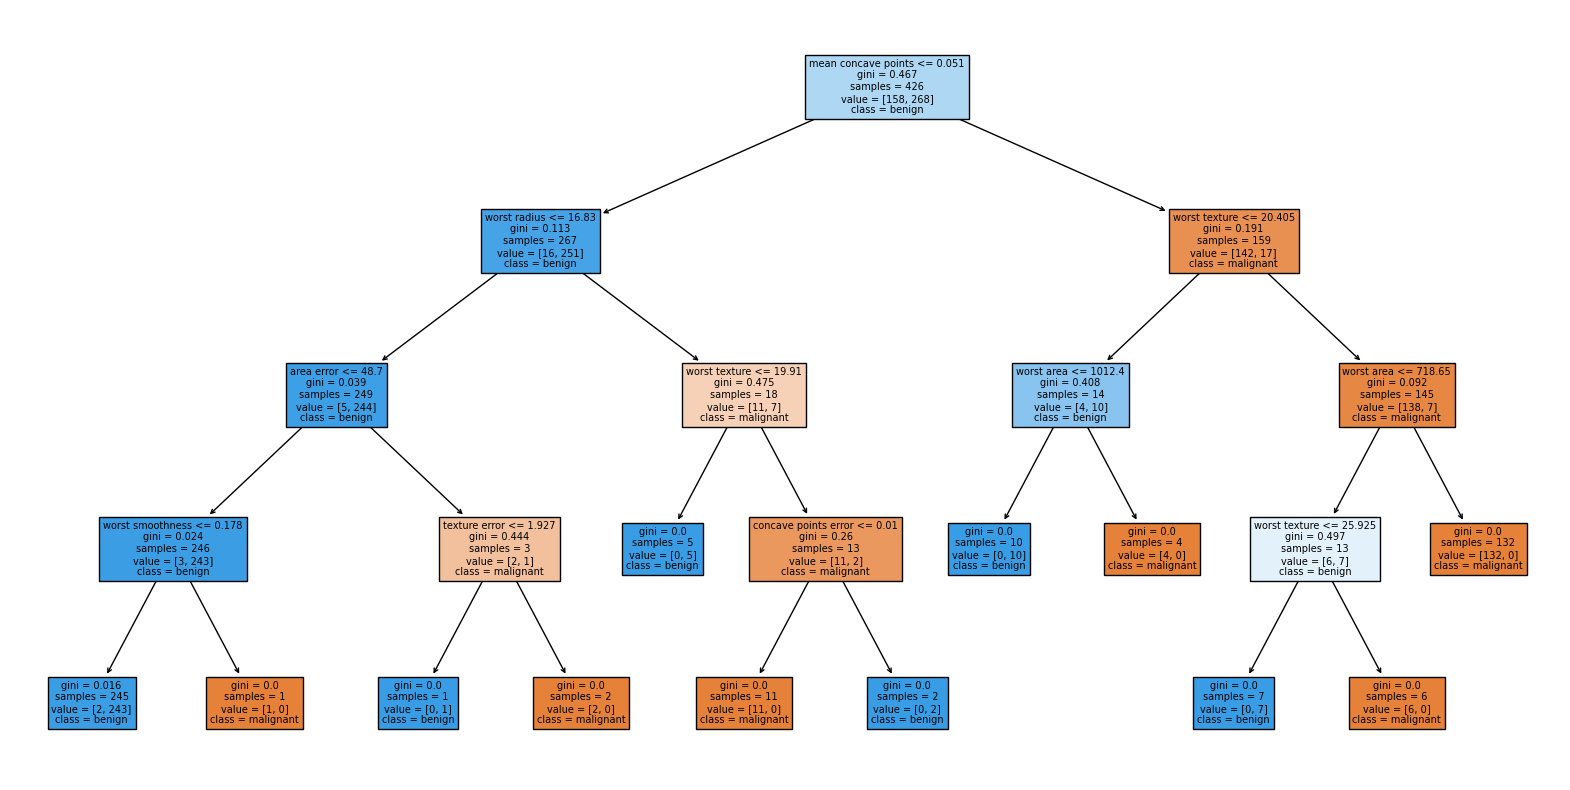

In [85]:
"""
This code visualizes the trained decision tree model (dt_model) using matplotlib. It:

Sets the figure size to 20x10 for better readability.

Uses tree.plot_tree() to draw the tree structure, showing splits based on feature values.

Labels each node with feature names, class names, and includes color coding (filled=True) to indicate class purity.

plt.show() displays the plot.
"""

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model,feature_names=data.feature_names,class_names=data.target_names,filled=True)
plt.show()